<a href="https://colab.research.google.com/github/mohamed-stifi/-Image-Classification-with-PyTorch-and-CIFAR-10-dataset/blob/main/_image_classification_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import transforms
from torchvision.utils import make_grid
%matplotlib inline
torch.manual_seed(43)

## Download and preprocess the CIFAR-10 dataset



In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = trainset.classes

100%|██████████| 170498071/170498071 [00:01<00:00, 86405516.50it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


With this for loop, we can get the number of images per class in train and test data set.

In [ ]:
train_class_count = {}
for _, index in trainset:
    label = classes[index]
    if label not in train_class_count:
        train_class_count[label] = 0
    train_class_count[label] += 1
test_class_count = {}
for _, index in testset:
    label = classes[index]
    if label not in test_class_count:
        test_class_count[label] = 0
    test_class_count[label] += 1
train_class_count,test_class_count

({'frog': 5000,
  'truck': 5000,
  'deer': 5000,
  'automobile': 5000,
  'bird': 5000,
  'horse': 5000,
  'ship': 5000,
  'cat': 5000,
  'dog': 5000,
  'airplane': 5000},
 {'cat': 1000,
  'ship': 1000,
  'airplane': 1000,
  'frog': 1000,
  'automobile': 1000,
  'truck': 1000,
  'dog': 1000,
  'horse': 1000,
  'deer': 1000,
  'bird': 1000})

Here, we can visualize a batch of data using the make_grid helper function from Torchvision.

images.shape: torch.Size([4, 3, 32, 32])
cat   horse ship  dog  


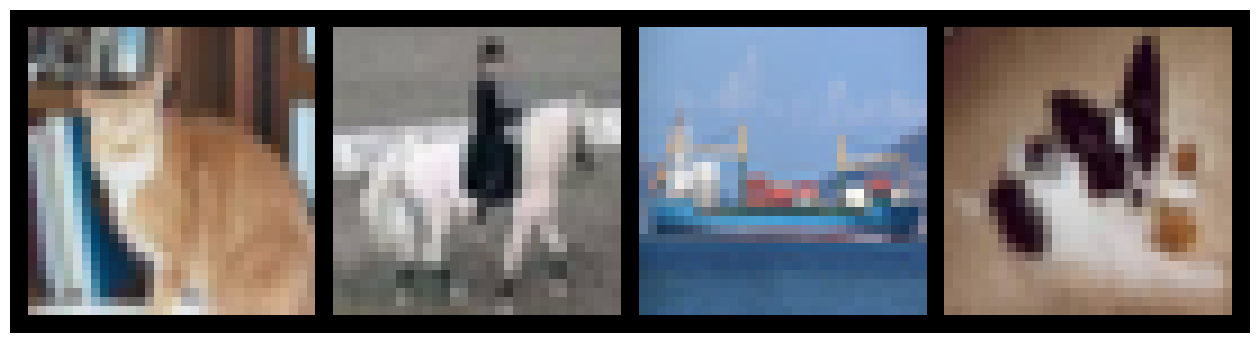

In [ ]:
for images, labels in trainloader:
    print('images.shape:', images.shape)
    print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
    images = images/2 + 0.5   # unnormalize
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    plt.xlabel(labels)
    break

images.shape: torch.Size([4, 3, 32, 32])
cat   ship  ship  airplane


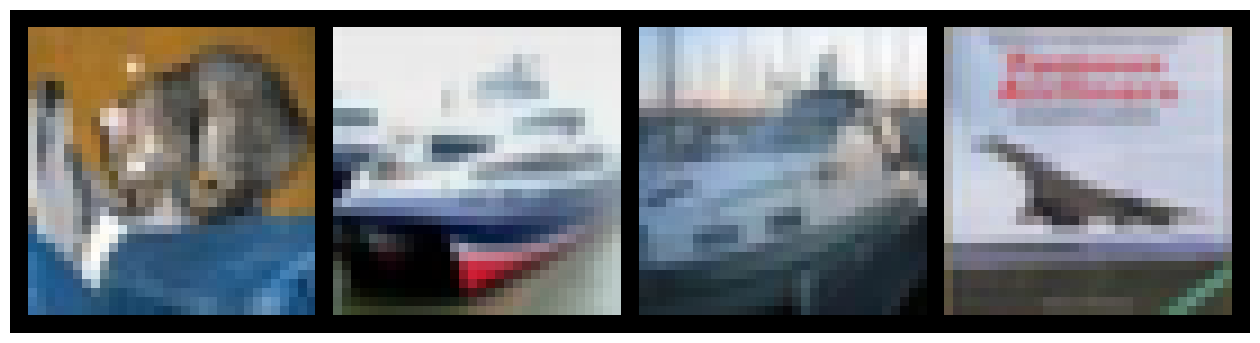

In [ ]:
for images, labels in testloader:
    print('images.shape:', images.shape)
    print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
    images = images/2 + 0.5   # unnormalize
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    plt.xlabel(labels)
    break

##Build a CNN model for image classification

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


##Train model on the training dataset

In [ ]:
cnn = CNN()
num_epook = 5
Loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.01)

In [ ]:
history = []
for epook  in  range(num_epook):
    for i, (imgs, labels) in enumerate(trainloader):
      if i%10 == 0 :
        optimizer.zero_grad()
        outs = cnn(imgs)
        loss = Loss(outs, labels)
        loss.backward()
        optimizer.step()
        if i % 1000 == 0:
          print(f"epook [{epook}/{num_epook}] | i = {i} | loss = {loss.item()}")
        history.append([loss.item(), accuracy(outs, labels)])


epook [0/5] | i = 0 | loss = 2.2939932346343994
epook [0/5] | i = 1000 | loss = 2.3093085289001465
epook [0/5] | i = 2000 | loss = 2.3217790126800537
epook [0/5] | i = 3000 | loss = 2.3068528175354004
epook [0/5] | i = 4000 | loss = 2.287153959274292
epook [0/5] | i = 5000 | loss = 2.3204920291900635
epook [0/5] | i = 6000 | loss = 2.3145806789398193
epook [0/5] | i = 7000 | loss = 2.2807698249816895
epook [0/5] | i = 8000 | loss = 2.2841086387634277
epook [0/5] | i = 9000 | loss = 2.2649238109588623
epook [0/5] | i = 10000 | loss = 2.30293607711792
epook [0/5] | i = 11000 | loss = 2.2417118549346924
epook [0/5] | i = 12000 | loss = 2.1992642879486084
epook [1/5] | i = 0 | loss = 2.3083248138427734
epook [1/5] | i = 1000 | loss = 2.0971133708953857
epook [1/5] | i = 2000 | loss = 2.342707633972168
epook [1/5] | i = 3000 | loss = 2.1954197883605957
epook [1/5] | i = 4000 | loss = 2.018808603286743
epook [1/5] | i = 5000 | loss = 1.960712194442749
epook [1/5] | i = 6000 | loss = 2.685733

In [ ]:
PATH = './cnn_model.pth'
torch.save(cnn.state_dict(), PATH)

##Evaluate model's performance on the test dataset

In [ ]:
cnn_load = CNN()
cnn_load.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

In [ ]:
outputs = cnn_load(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))
print('True: ', ' '.join(f'{classes[labels[j]]:5s}'
                              for j in range(4)))

Predicted:  ship  ship  ship  ship 
True:  cat   ship  ship  airplane


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:

        outputs = cnn_load(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 40 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}


with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = cnn_load(images)
        _, predictions = torch.max(outputs, 1)

        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: airplane is 42.0 %
Accuracy for class: automobile is 49.3 %
Accuracy for class: bird  is 11.0 %
Accuracy for class: cat   is 5.6 %
Accuracy for class: deer  is 33.1 %
Accuracy for class: dog   is 27.7 %
Accuracy for class: frog  is 58.2 %
Accuracy for class: horse is 71.7 %
Accuracy for class: ship  is 59.6 %
Accuracy for class: truck is 46.0 %


##Visualize the train of model

In [ ]:
def plot_losses(history):

    plt.plot(history, '-x')
    #plt.xlabel('epoch')
    plt.ylabel('loss')
    #plt.title('Loss vs. No. of epochs');

In [ ]:
def plot_accuracies(history):

    plt.plot(history, '-x')

    plt.ylabel('accuracy')


In [ ]:
history = np.array(history)

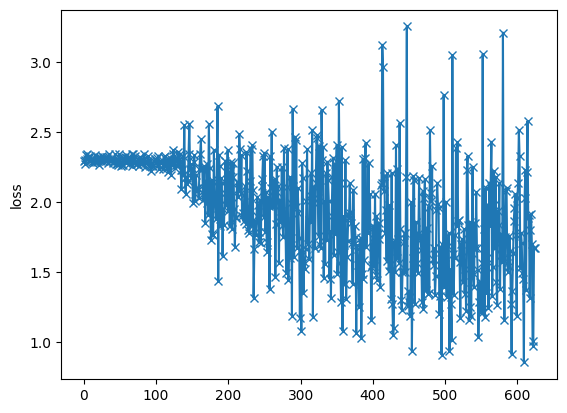

In [ ]:
plot_losses(history[::10,0])

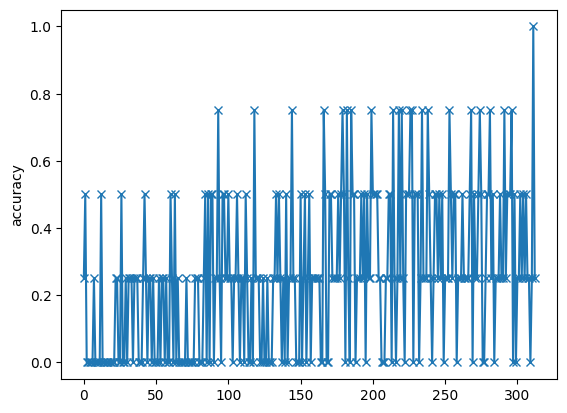

In [ ]:
plot_accuracies(history[::20,1])